In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from collections import Counter
%matplotlib inline
sns.set_style('whitegrid')

In [5]:
df=pd.read_csv('C:/Users/14692/Documents/Python/Netflix/netflix_titles_nov_2019.csv')
df.head()

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type
0,81193313,Chocolate,NaN,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,"November 30, 2019",2019,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...",Brought together by meaningful meals in the pa...,TV Show
1,81197050,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,NaN,"November 30, 2019",2019,TV-G,67 min,"Documentaries, International Movies","From Sierra de las Minas to Esquipulas, explor...",Movie
2,81213894,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,"November 30, 2019",2019,TV-14,135 min,"Comedies, Dramas, International Movies",A goofy copywriter unwittingly convinces the I...,Movie
3,81082007,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...","France, Senegal, Belgium","November 29, 2019",2019,TV-14,106 min,"Dramas, Independent Movies, International Movies","Arranged to marry a rich man, young Ada is cru...",Movie
4,80213643,Chip and Potato,NaN,"Abigail Oliver, Andrea Libman, Briana Buckmast...","Canada, United Kingdom",NaN,2019,TV-Y,2 Seasons,Kids' TV,"Lovable pug Chip starts kindergarten, makes ne...",TV Show


In [6]:
df.shape

(5837, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5837 entries, 0 to 5836
Data columns (total 12 columns):
show_id         5837 non-null int64
title           5837 non-null object
director        3936 non-null object
cast            5281 non-null object
country         5410 non-null object
date_added      5195 non-null object
release_year    5837 non-null int64
rating          5827 non-null object
duration        5837 non-null object
listed_in       5837 non-null object
description     5837 non-null object
type            5837 non-null object
dtypes: int64(2), object(10)
memory usage: 547.3+ KB


In [8]:
pd.DataFrame(df.columns)

,0
0,show_id
1,title
2,director
3,cast
4,country
5,date_added
6,release_year
7,rating
8,duration
9,listed_in


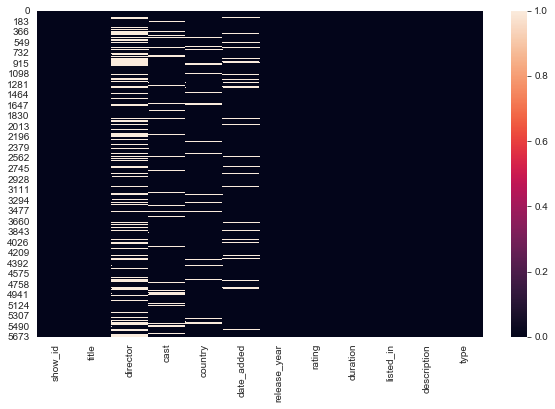

In [9]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull())

In [10]:
df['date_added']=pd.to_datetime(df['date_added'])
df['release_year']=pd.to_datetime(df['release_year'], format='%Y')
df['release_year']=df['release_year'].dt.year

In [11]:
df.head()

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type
0,81193313,Chocolate,NaN,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,2019-11-30,2019,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...",Brought together by meaningful meals in the pa...,TV Show
1,81197050,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,NaN,2019-11-30,2019,TV-G,67 min,"Documentaries, International Movies","From Sierra de las Minas to Esquipulas, explor...",Movie
2,81213894,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,2019-11-30,2019,TV-14,135 min,"Comedies, Dramas, International Movies",A goofy copywriter unwittingly convinces the I...,Movie
3,81082007,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...","France, Senegal, Belgium",2019-11-29,2019,TV-14,106 min,"Dramas, Independent Movies, International Movies","Arranged to marry a rich man, young Ada is cru...",Movie
4,80213643,Chip and Potato,NaN,"Abigail Oliver, Andrea Libman, Briana Buckmast...","Canada, United Kingdom",NaT,2019,TV-Y,2 Seasons,Kids' TV,"Lovable pug Chip starts kindergarten, makes ne...",TV Show


In [12]:
(df['type'].value_counts())*100/df.shape[0]

Movie      67.483296
TV Show    32.516704
Name: type, dtype: float64

In [13]:
df['year_added']=df['date_added'].dt.year
    
df['month_added']=(df['date_added'].dt.month)
df.head()

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type,year_added,month_added
0,81193313,Chocolate,NaN,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,2019-11-30,2019,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...",Brought together by meaningful meals in the pa...,TV Show,2019.0,11.0
1,81197050,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,NaN,2019-11-30,2019,TV-G,67 min,"Documentaries, International Movies","From Sierra de las Minas to Esquipulas, explor...",Movie,2019.0,11.0
2,81213894,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,2019-11-30,2019,TV-14,135 min,"Comedies, Dramas, International Movies",A goofy copywriter unwittingly convinces the I...,Movie,2019.0,11.0
3,81082007,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...","France, Senegal, Belgium",2019-11-29,2019,TV-14,106 min,"Dramas, Independent Movies, International Movies","Arranged to marry a rich man, young Ada is cru...",Movie,2019.0,11.0
4,80213643,Chip and Potato,NaN,"Abigail Oliver, Andrea Libman, Briana Buckmast...","Canada, United Kingdom",NaT,2019,TV-Y,2 Seasons,Kids' TV,"Lovable pug Chip starts kindergarten, makes ne...",TV Show,NaN,NaN


In [14]:
df['year_added'].value_counts().sort_index()

2008.0       2
2009.0       2
2010.0       1
2011.0      13
2012.0       7
2013.0       9
2014.0      19
2015.0      74
2016.0     412
2017.0    1184
2018.0    1629
2019.0    1843
Name: year_added, dtype: int64

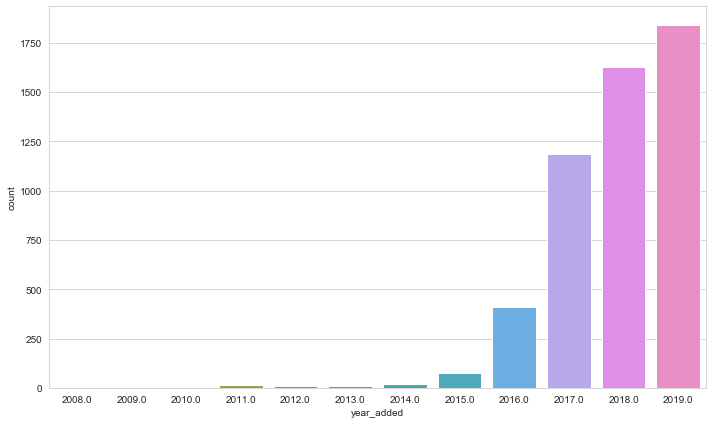

In [15]:
plt.figure(figsize=(10,6))
sns.countplot('year_added', data=df)
plt.tight_layout()
plt.show()

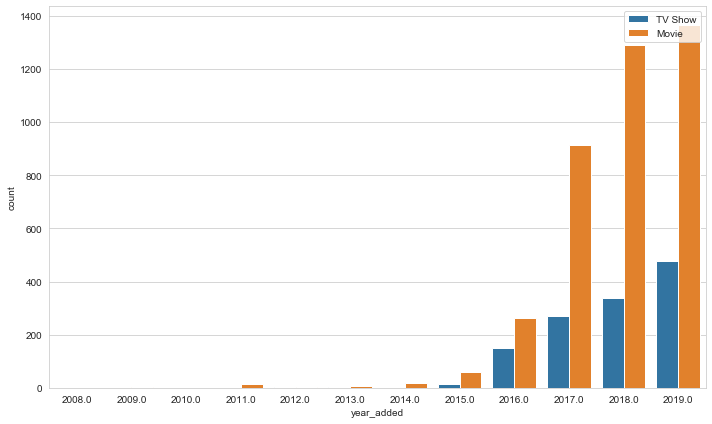

In [16]:
plt.figure(figsize=(10,6))
sns.countplot('year_added', data=df, hue='type')
plt.tight_layout()
plt.legend(loc='best')
plt.show()

In [17]:
tvshow_year=df[df['type']=='TV Show']['year_added'].value_counts().sort_index()
tvshow_year

2008.0      1
2012.0      3
2013.0      3
2015.0     16
2016.0    148
2017.0    271
2018.0    339
2019.0    476
Name: year_added, dtype: int64

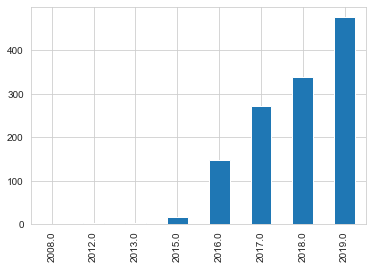

In [18]:
tvshow_year.plot(kind='bar')

In [19]:
tvshow_year.pct_change()

2008.0         NaN
2012.0    2.000000
2013.0    0.000000
2015.0    4.333333
2016.0    8.250000
2017.0    0.831081
2018.0    0.250923
2019.0    0.404130
Name: year_added, dtype: float64

C:\Users\14692\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\14692\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


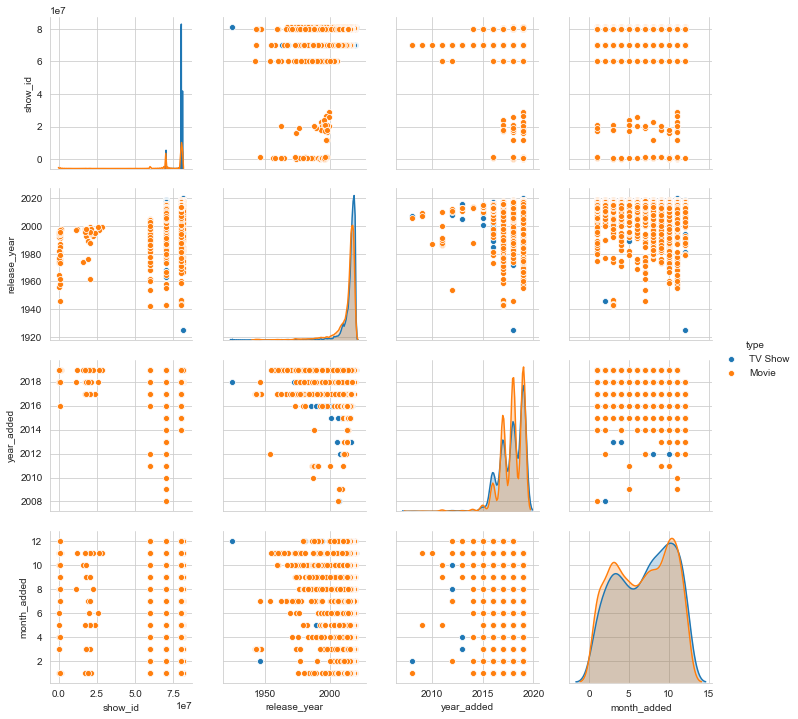

In [20]:
sns.pairplot(df,hue='type')

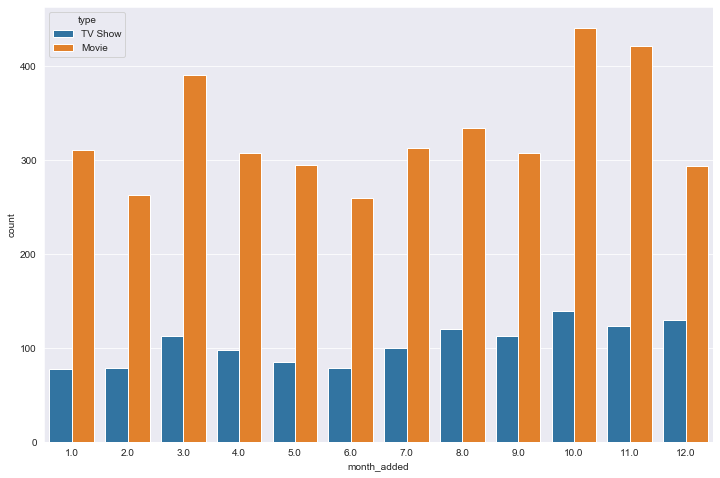

In [21]:
sns.set_style('darkgrid')
plt.figure(figsize=(12,8))
sns.countplot('month_added',data=df, hue='type')
plt.show()

In [22]:
df['listed_in']=df['listed_in'].astype('str')
df['listed_in_len']=df['listed_in'].apply(lambda x: len(x.split(',')))

In [23]:
ddd1=df['listed_in'][0].split()
dd=ddd1[0].strip()
ddd1

['International',
 'TV',
 'Shows,',
 'Korean',
 'TV',
 'Shows,',
 'Romantic',
 'TV',
 'Shows']

In [24]:
set('shivang')

{'a', 'g', 'h', 'i', 'n', 's', 'v'}

In [25]:
a=Counter('aaasfa')

In [26]:
a.update('aa31ddm')

In [27]:
listing=set()
count_listings=Counter()

for listings in df['listed_in']:
    listings=listings.split(",")
    listing.update([lst.strip() for lst in listings])
    for lst in listings:
        count_listings[lst.strip()]+=1

In [28]:
count_listings

Counter({'International TV Shows': 966,
         'Korean TV Shows': 120,
         'Romantic TV Shows': 265,
         'Documentaries': 658,
         'International Movies': 1797,
         'Comedies': 992,
         'Dramas': 1488,
         'Independent Movies': 516,
         "Kids' TV": 313,
         'Thrillers': 353,
         'Crime TV Shows': 355,
         'Spanish-Language TV Shows': 114,
         'Reality TV': 146,
         'Action & Adventure': 532,
         'TV Comedies': 425,
         'Docuseries': 271,
         'Children & Family Movies': 340,
         'Anime Series': 111,
         'Stand-Up Comedy & Talk Shows': 42,
         'TV Dramas': 574,
         'Romantic Movies': 338,
         'Stand-Up Comedy': 273,
         'Movies': 55,
         'TV Mysteries': 66,
         'Classic Movies': 65,
         'TV Sci-Fi & Fantasy': 66,
         'Sci-Fi & Fantasy': 165,
         'Anime Features': 41,
         'Sports Movies': 149,
         'TV Action & Adventure': 122,
         'Cult Movies'

In [29]:
listing

{'Action & Adventure',
 'Anime Features',
 'Anime Series',
 'British TV Shows',
 'Children & Family Movies',
 'Classic & Cult TV',
 'Classic Movies',
 'Comedies',
 'Crime TV Shows',
 'Cult Movies',
 'Documentaries',
 'Docuseries',
 'Dramas',
 'Faith & Spirituality',
 'Horror Movies',
 'Independent Movies',
 'International Movies',
 'International TV Shows',
 "Kids' TV",
 'Korean TV Shows',
 'LGBTQ Movies',
 'Movies',
 'Music & Musicals',
 'Reality TV',
 'Romantic Movies',
 'Romantic TV Shows',
 'Sci-Fi & Fantasy',
 'Science & Nature TV',
 'Spanish-Language TV Shows',
 'Sports Movies',
 'Stand-Up Comedy',
 'Stand-Up Comedy & Talk Shows',
 'TV Action & Adventure',
 'TV Comedies',
 'TV Dramas',
 'TV Horror',
 'TV Mysteries',
 'TV Sci-Fi & Fantasy',
 'TV Shows',
 'TV Thrillers',
 'Teen TV Shows',
 'Thrillers'}

In [30]:
listings_title=pd.DataFrame.from_dict(count_listings,orient='index')
listings_title

,0
International TV Shows,966
Korean TV Shows,120
Romantic TV Shows,265
Documentaries,658
International Movies,1797
Comedies,992
Dramas,1488
Independent Movies,516
Kids' TV,313
Thrillers,353


In [31]:
listings_title.sort_values(0,ascending=False,inplace=True)
listings_title.rename(columns={0:'count'},inplace=True)


In [32]:
listings_title

,count
International Movies,1797
Dramas,1488
Comedies,992
International TV Shows,966
Documentaries,658
TV Dramas,574
Action & Adventure,532
Independent Movies,516
TV Comedies,425
Crime TV Shows,355


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

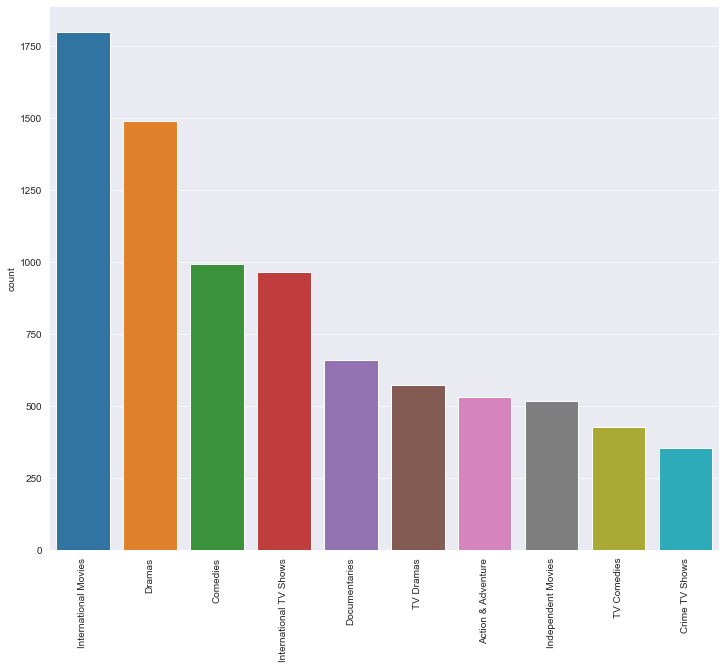

In [33]:
plt.figure(figsize=(12,10))
sns.barplot(x=listings_title[:10].index,y='count',data=listings_title[:10])
plt.xticks(rotation=90)

In [34]:
df['country']=df['country'].astype('str')
df['num_countries']=df['country'].apply(lambda x:len(x.split(",")))

country=set()
count_country=Counter()

for c in df['country']:
    if c not in ['nan','']:
        c=c.split(",")
        country.update([cs.strip() for cs in c])
        for cs in c:
            count_country[cs.strip()]+=1

In [35]:
countries_df=pd.DataFrame.from_dict(count_country,orient='index')
countries_df.sort_values(0,ascending=False,inplace=True)
countries_df.rename(columns={0:'count'},inplace=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

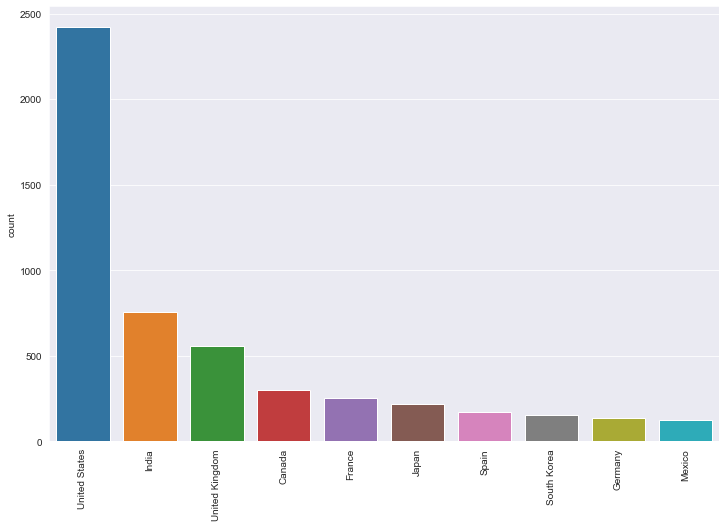

In [36]:
plt.figure(figsize=(12,8))
sns.barplot(x=countries_df[:10].index, y='count', data=countries_df[:10])
plt.xticks(rotation=90)

In [37]:
df['rating'].value_counts()


TV-MA       1937
TV-14       1593
TV-PG        678
R            439
PG-13        227
NR           218
PG           160
TV-Y7        156
TV-G         147
TV-Y         139
TV-Y7-FV      92
G             32
UR             7
NC-17          2
Name: rating, dtype: int64

In [38]:
df.groupby('type')['rating'].value_counts()

type     rating  
Movie    TV-MA       1288
         TV-14        955
         R            437
         TV-PG        413
         PG-13        227
         NR           202
         PG           160
         TV-G          79
         TV-Y7         62
         TV-Y          41
         G             31
         TV-Y7-FV      27
         UR             7
         NC-17          2
TV Show  TV-MA        649
         TV-14        638
         TV-PG        265
         TV-Y          98
         TV-Y7         94
         TV-G          68
         TV-Y7-FV      65
         NR            16
         R              2
         G              1
Name: rating, dtype: int64

In [39]:
tv_unique_rating=set(df[df['type']=='TV Show'].rating.unique())

In [40]:
movie_unique_rating=set(df[df['type']=='Movie'].rating.unique())

In [41]:
tv_unique_rating-movie_unique_rating

set()

In [42]:
movie_unique_rating-tv_unique_rating

{'NC-17', 'PG', 'PG-13', 'UR'}

In [43]:
df['director']=df['director'].astype('str')
df['director_split_len']=df['director'].apply(lambda x: len(x.split(',')))

In [44]:
multidirector_df=df.loc[df['director_split_len']>1,]

In [45]:
multidirector_df['director_split_len'].value_counts()

2     373
3      22
4      10
5       4
10      3
12      2
7       2
13      1
11      1
9       1
8       1
Name: director_split_len, dtype: int64

In [46]:
multidirector_df.loc[multidirector_df['director_split_len']>5,['title','director','director_split_len']].sort_index()

,title,director,director_split_len
527,Sturgill Simpson Presents Sound & Fury,"Jumpei Mizusaki, Koji Morimoto, Michael Arias,...",10
745,Til Death Do Us Part,"Cho Li, Chen Hung-yi, Weica Wang, Liu Bang-yao...",7
1518,Movie 43,"Peter Farrelly, Will Graham, Steve Carr, Griff...",12
2798,Once Upon a Time,"Mario Van Peebles, Ralph Hemecker, Gwyneth Hor...",7
3690,The Heyday of the Insensitive Bastards,"Mark Columbus, Lauren Hoekstra, Sarah Kruchows...",8
3852,Don Quixote: The Ingenious Gentleman of La Mancha,"Mahin Ibrahim, Austin Kolodney, Will Lowell, D...",10
4257,Kahlil Gibran's The Prophet,"Roger Allers, Gaëtan Brizzi, Paul Brizzi, Joan...",10
4788,HALO Legends,"Shinji Aramaki, Mamoru Oshii, Hideki Futamura,...",12
5521,Holidays,"Anthony Scott Burns, Nicholas McCarthy, Adam E...",9
5545,X: Past Is Present,"Hemant Gaba, Pratim D. Gupta, Sudhish Kamath, ...",11


In [52]:
director_split_data=multidirector_df.loc[multidirector_df['director_split_len']>5,['title','director','director_split_len']]

In [98]:
director_split_data.sort_values(by='director_split_len', ascending=False)

,title,director,director_split_len
5712,Walt Disney Animation Studios Short Films Coll...,"Chris Buck, Jennifer Lee, Patrick Osborne, Lau...",13
1518,Movie 43,"Peter Farrelly, Will Graham, Steve Carr, Griff...",12
4788,HALO Legends,"Shinji Aramaki, Mamoru Oshii, Hideki Futamura,...",12
5545,X: Past Is Present,"Hemant Gaba, Pratim D. Gupta, Sudhish Kamath, ...",11
527,Sturgill Simpson Presents Sound & Fury,"Jumpei Mizusaki, Koji Morimoto, Michael Arias,...",10
3852,Don Quixote: The Ingenious Gentleman of La Mancha,"Mahin Ibrahim, Austin Kolodney, Will Lowell, D...",10
4257,Kahlil Gibran's The Prophet,"Roger Allers, Gaëtan Brizzi, Paul Brizzi, Joan...",10
5521,Holidays,"Anthony Scott Burns, Nicholas McCarthy, Adam E...",9
3690,The Heyday of the Insensitive Bastards,"Mark Columbus, Lauren Hoekstra, Sarah Kruchows...",8
745,Til Death Do Us Part,"Cho Li, Chen Hung-yi, Weica Wang, Liu Bang-yao...",7


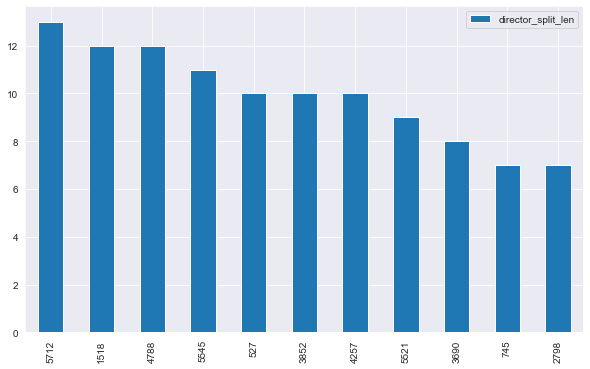

In [99]:
director_split_data.sort_values(by='director_split_len', ascending=False).plot(kind='bar',figsize=(10,6),use_index=director_split_data.reset_index)
plt.show()

It shows that Walt Disney Animation Movie has the maximum number of directors collaborated.